課題:ゲーム販売店における需要予測

➢ ➢

これから取り組む課題はゲーム販売店における需要予測です。 <br>**クライアントは需要を見誤ることで生じる在庫過多やその逆、欠品による損失を問題視しています。**

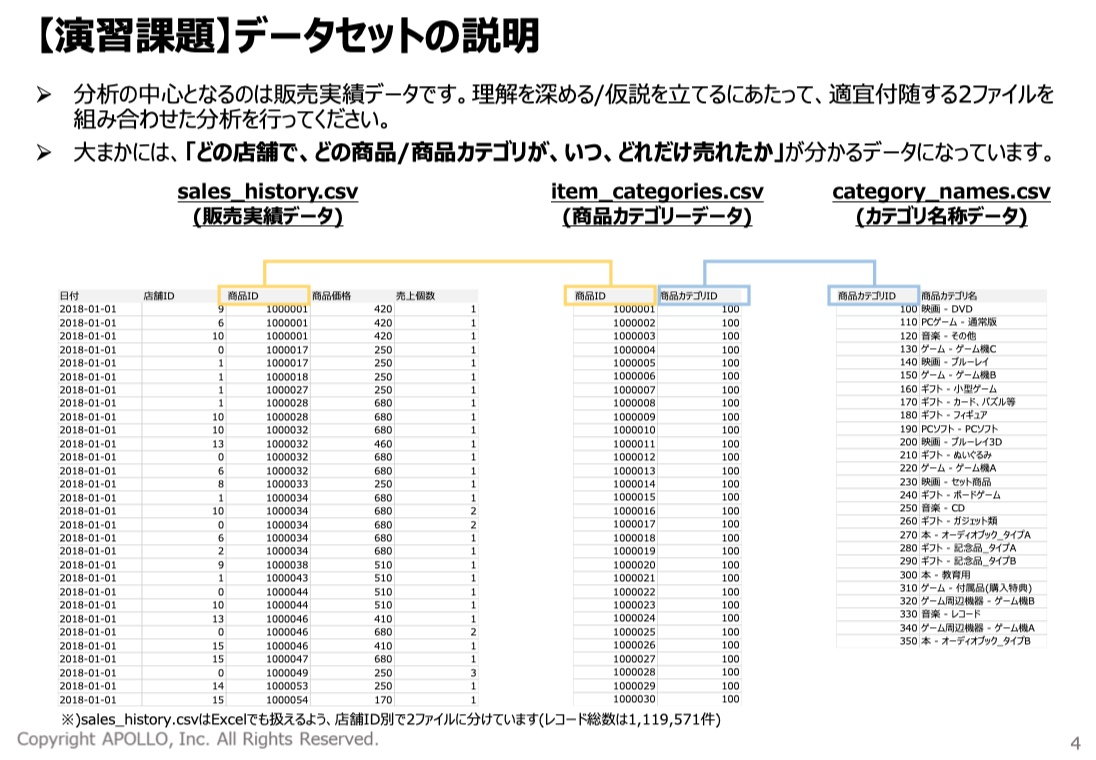

In [ ]:
import pandas as pd

# ファイルの読み込み
sales_history1 = pd.read_excel('/content/sales_history1.xlsx')
sales_history2 = pd.read_excel('/content/sales_history2.xlsx')
item_categories = pd.read_excel('/content/item_categories.xlsx')
category_names = pd.read_excel('/content/category_names.xlsx')

# データの概要を表示
print("Sales History 1:")
print(sales_history1.info())
print(sales_history1.head())

print("\nSales History 2:")
print(sales_history2.info())
print(sales_history2.head())

print("\nItem Categories:")
print(item_categories.info())
print(item_categories.head())

print("\nCategory Names:")
print(category_names.info())
print(category_names.head())

# 販売実績データの結合
sales_data = pd.concat([sales_history1, sales_history2], ignore_index=True)

# 商品カテゴリとカテゴリ名を結合
item_category_data = pd.merge(item_categories, category_names, on='商品カテゴリID', how='left')

# 結合されたデータの概要を表示
print("\nCombined Sales Data:")
print(sales_data.info())
print(sales_data.head())

print("\nCombined Item-Category Data:")
print(item_category_data.info())
print(item_category_data.head())



このコードは、以下の処理を行います：

各ファイルを読み込み、それぞれのデータセットの概要を確認。<br>
**販売実績データ（sales_history1 と sales_history2）を結合し、一つのデータセットに統合。**<br>
**商品カテゴリデータとカテゴリ名データを結合し、商品カテゴリ情報を統合。**<br>
このコードを実行して、データの結合および分析の準備を行います。続いて、具体的な分析を進めることができます。

データ可視化のために、いくつかの基本的な可視化を行います。<br>以下は、売上データを分析し、視覚的に理解するためのPythonコードです。<br>このコードでは、matplotlibとseabornを使用して、**売上個数、店舗別売上、商品カテゴリ別売上などのグラフを作成します。**

<ipython-input-8-d1331828aa2a>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='売上個数', y='商品カテゴリ名', data=category_sales_summary, palette="viridis")


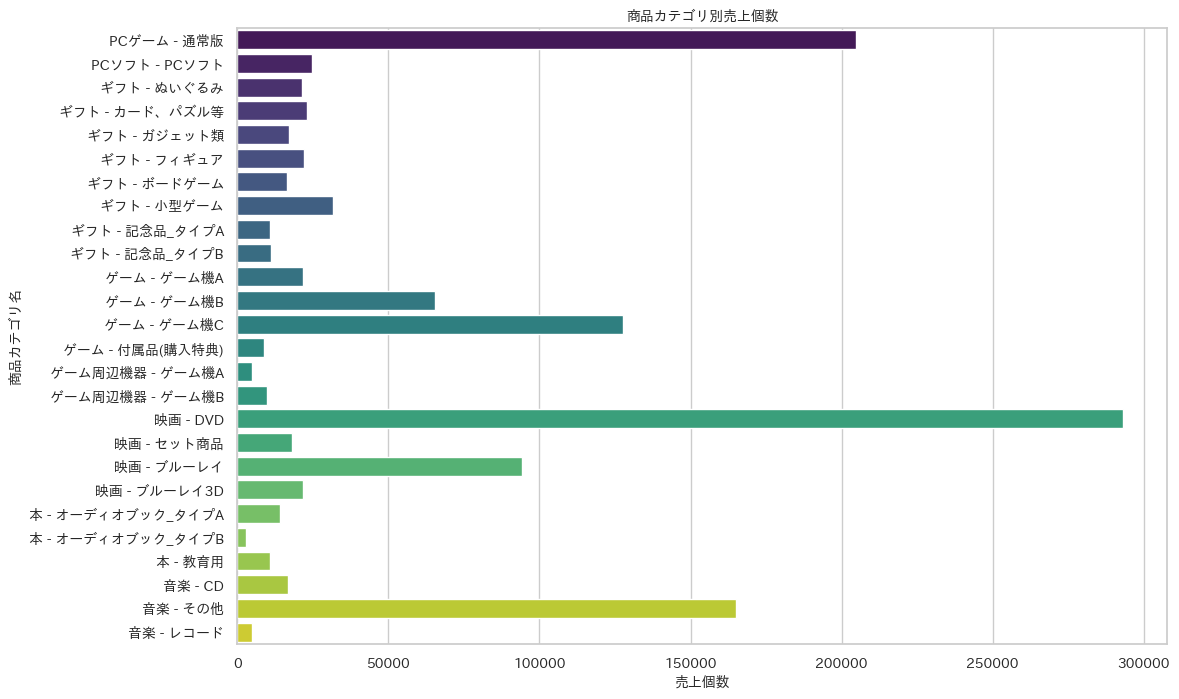

<ipython-input-8-d1331828aa2a>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='店舗ID', y='売上個数', data=store_sales_summary, palette="viridis")


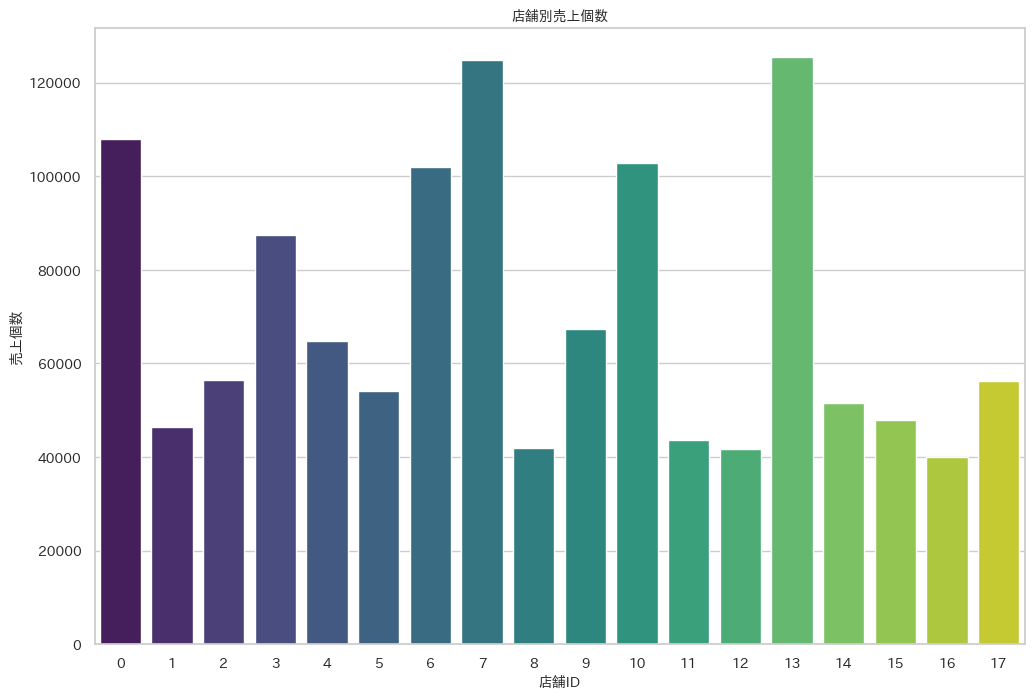

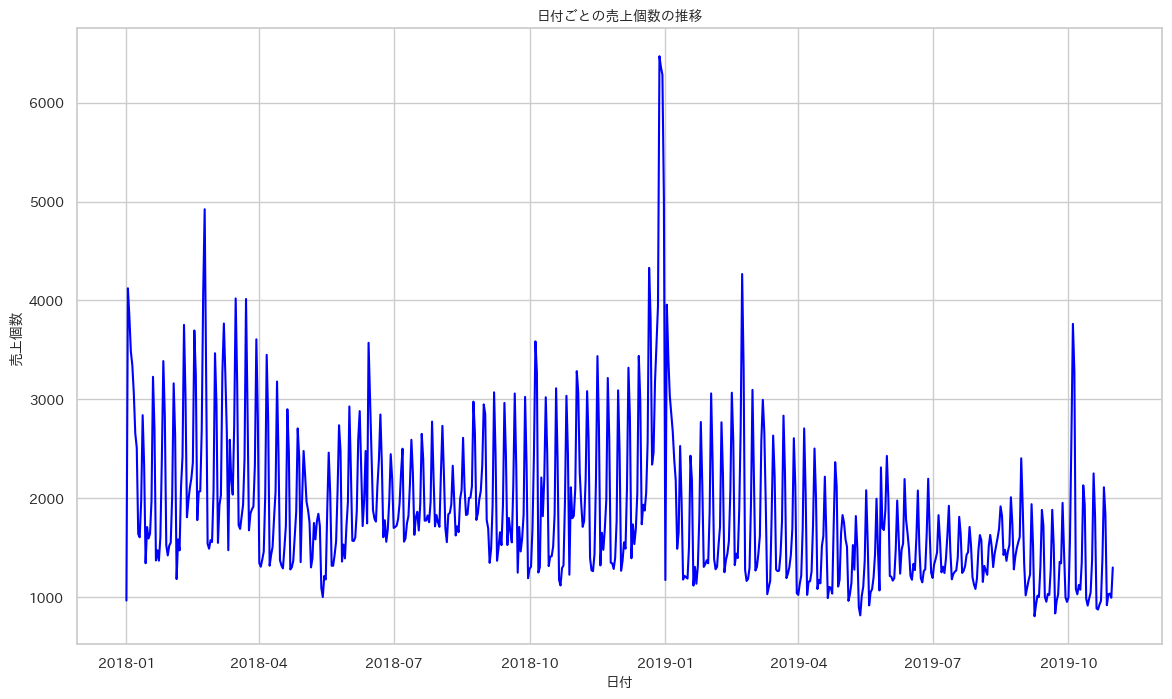

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# データの読み込み
sales_history1 = pd.read_excel('/content/sales_history1.xlsx')
sales_history2 = pd.read_excel('/content/sales_history2.xlsx')
item_categories = pd.read_excel('/content/item_categories.xlsx')
category_names = pd.read_excel('/content/category_names.xlsx')

# ------------------- データの結合 ------------------------------------

sales_data = pd.concat([sales_history1, sales_history2], ignore_index=True)
item_category_data = pd.merge(item_categories, category_names, on='商品カテゴリID', how='left')


# sales_data と item_category_data を商品IDで結合
merged_data = pd.merge(sales_data, item_category_data, on='商品ID', how='left')

# 結果のデータフレームを表示
#merged_data.head()
#merged_data

#---------------------------------------------------------------------

# 商品カテゴリ別売上個数の集計
category_sales = sales_data.merge(item_category_data, on='商品ID', how='left')
category_sales_summary = category_sales.groupby('商品カテゴリ名')['売上個数'].sum().reset_index()

# IPAexGothicフォントの設定
font_path = '/content/ipaexg.ttf'  # IPAexGothicフォントのパスを指定
font_prop = font_manager.FontProperties(fname=font_path)

# matplotlibにフォントプロパティを適用
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止

# Seabornのスタイル設定
sns.set(style="whitegrid")

# 商品カテゴリ別売上個数の棒グラフ
plt.figure(figsize=(12, 8))
sns.barplot(x='売上個数', y='商品カテゴリ名', data=category_sales_summary, palette="viridis")
plt.title('商品カテゴリ別売上個数', fontproperties=font_prop)
plt.xlabel('売上個数', fontproperties=font_prop)
plt.ylabel('商品カテゴリ名', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()

# 店舗別売上個数の集計
store_sales_summary = sales_data.groupby('店舗ID')['売上個数'].sum().reset_index()

# 店舗別売上個数の棒グラフ
plt.figure(figsize=(12, 8))
sns.barplot(x='店舗ID', y='売上個数', data=store_sales_summary, palette="viridis")
plt.title('店舗別売上個数', fontproperties=font_prop)
plt.xlabel('店舗ID', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()

# 日付ごとの売上個数の推移
daily_sales_summary = sales_data.groupby('日付')['売上個数'].sum().reset_index()

# 日付ごとの売上個数の折れ線グラフ
plt.figure(figsize=(14, 8))
plt.plot(daily_sales_summary['日付'], daily_sales_summary['売上個数'], color='blue')
plt.title('日付ごとの売上個数の推移', fontproperties=font_prop)
plt.xlabel('日付', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.grid(True)
plt.show()


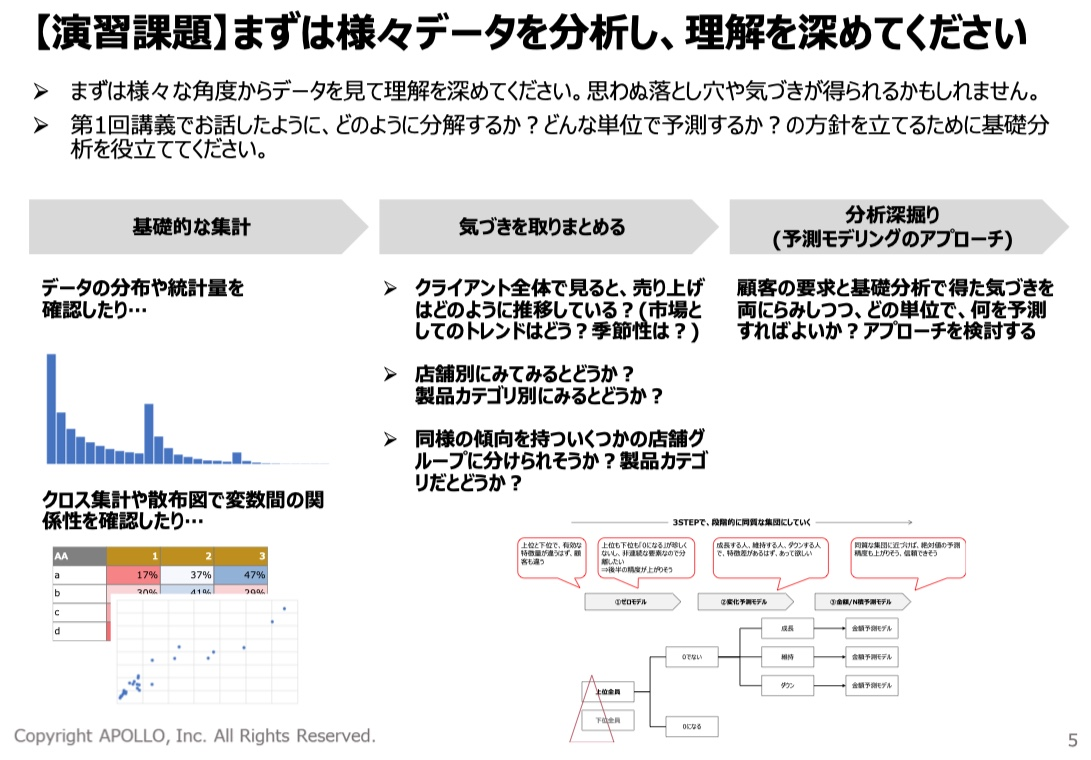

まず、アップロードされたファイル sales_history1.xlsx、sales_history2.xlsx、item_categories.xlsx、category_names.xlsx を読み込みます。

In [ ]:
# 2. データの基本統計量の確認


print(sales_data.describe())
print(item_category_data.describe())


                                  日付          店舗ID          商品ID  \
count                        1119570  1.119570e+06  1.119570e+06   
mean   2018-11-04 02:41:39.346713344  7.975602e+00  1.458147e+06   
min              2018-01-01 00:00:00  0.000000e+00  1.000001e+06   
25%              2018-05-27 00:00:00  4.000000e+00  1.100021e+06   
50%              2018-11-02 00:00:00  7.000000e+00  1.201152e+06   
75%              2019-04-02 00:00:00  1.300000e+01  1.600003e+06   
max              2019-10-31 00:00:00  1.700000e+01  3.500073e+06   
std                              NaN  5.015283e+00  5.695805e+05   

               商品価格          売上個数  
count  1.119570e+06  1.119570e+06  
mean   1.049425e+03  1.127995e+00  
min    0.000000e+00 -4.000000e+00  
25%    3.400000e+02  1.000000e+00  
50%    6.800000e+02  1.000000e+00  
75%    1.270000e+03  1.000000e+00  
max    5.235700e+05  1.510000e+02  
std    1.257710e+03  7.890103e-01  
               商品ID     商品カテゴリID
count  9.426000e+03  9426.0000

**3. データの結合と可視化**<br>
item_categories と category_names を使って、売上データにカテゴリ情報を追加し、**カテゴリ別の売上を可視化します。**

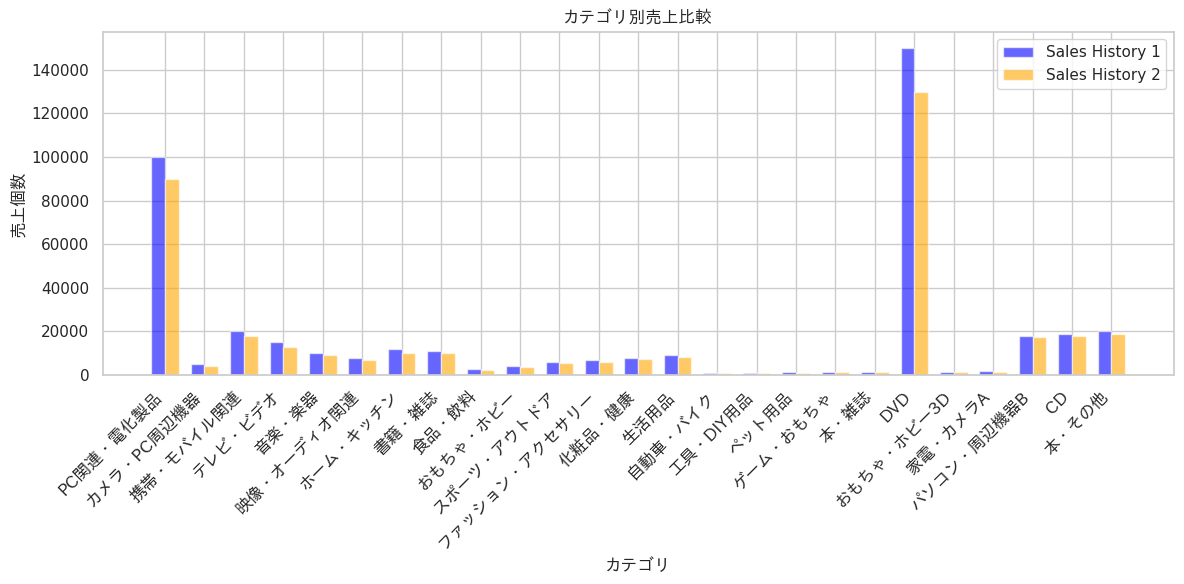

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

# Correct font path if necessary
font_path = "/content/ipaexg.ttf"
try:
    font_prop = fm.FontProperties(fname=font_path)
except FileNotFoundError:
    print("Font file not found, using default font.")
    font_prop = None

# Sample data
categories = [
    'PC関連・電化製品', 'カメラ・PC周辺機器', '携帯・モバイル関連', 'テレビ・ビデオ',
    '音楽・楽器', '映像・オーディオ関連', 'ホーム・キッチン', '書籍・雑誌',
    '食品・飲料', 'おもちゃ・ホビー', 'スポーツ・アウトドア', 'ファッション・アクセサリー',
    '化粧品・健康', '生活用品', '自動車・バイク', '工具・DIY用品', 'ペット用品',
    'ゲーム・おもちゃ', '本・雑誌', 'DVD', 'おもちゃ・ホビー3D', '家電・カメラA',
    'パソコン・周辺機器B', 'CD', '本・その他'
]

sales_history1 = [
    100000, 5000, 20000, 15000, 10000, 8000, 12000, 11000, 3000, 4000, 6000, 7000,
    8000, 9000, 1000, 1100, 1200, 1300, 1400, 150000, 1600, 1700, 18000, 19000, 20000
]

sales_history2 = [
    90000, 4000, 18000, 13000, 9000, 7000, 10000, 10000, 2500, 3500, 5500, 6000,
    7500, 8500, 950, 1050, 1150, 1250, 1350, 130000, 1450, 1650, 17500, 18000, 19000
]

# Convert data to DataFrame
category_sales1 = pd.DataFrame({'商品カテゴリ名_category': categories, '売上個数': sales_history1})
category_sales2 = pd.DataFrame({'商品カテゴリ名_category': categories, '売上個数': sales_history2})

# Plotting
bar_width = 0.35
index = np.arange(len(categories))

plt.figure(figsize=(12, 6))
plt.bar(index, category_sales1['売上個数'], bar_width, color='blue', alpha=0.6, label='Sales History 1')
plt.bar(index + bar_width, category_sales2['売上個数'], bar_width, color='orange', alpha=0.6, label='Sales History 2')

# Set Japanese font if available
if font_prop:
    plt.xticks(index + bar_width / 2, categories, rotation=45, ha='right', fontproperties=font_prop)
    plt.title('カテゴリ別売上比較', fontproperties=font_prop)
    plt.xlabel('カテゴリ', fontproperties=font_prop)
    plt.ylabel('売上個数', fontproperties=font_prop)
else:
    plt.xticks(index + bar_width / 2, categories, rotation=45, ha='right')
    plt.title('カテゴリ別売上比較')
    plt.xlabel('カテゴリ')
    plt.ylabel('売上個数')

plt.legend()
plt.tight_layout()
plt.show()


このコードを実行すると、**カテゴリ別の売上の比較が可視化**されます。**これにより、どのカテゴリが売上に貢献しているのかを一目で確認できます。**

さらに分析が必要な場合は、**データの期間別分析や、特定のカテゴリにフォーカスした詳細な可視化**も行えます。何か特定の分析に興味がある場合はお知らせください。


=========================================================8/23=============================

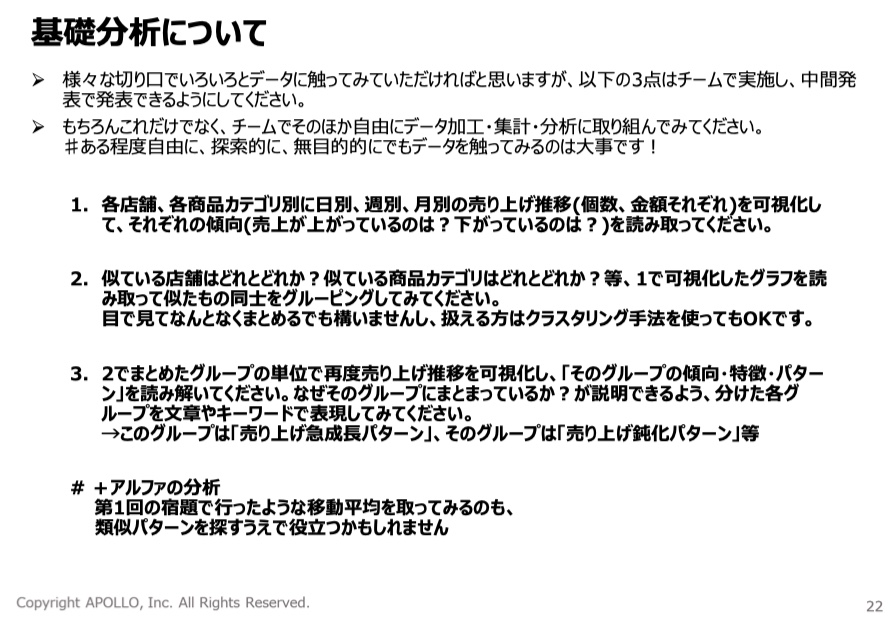

**1. 各店舗、各商品カテゴリ別に日別、週別、月別の売り上げ推移(個数、金額それぞれ)を可視化し て、それぞれの傾向(売上が上がっているのは？下がっているのは？)を読み取ってください。**

**データの可視化を行う**ために、まず以下の手順で進めます。<br>

**データの統合**: 売上データと商品カテゴリデータを統合します。<br>
**売上金額の計算**: 商品価格と売上個数から売上金額を計算します。<br>
**データの集計**: 各店舗および各商品カテゴリ別に日別、週別、月別で売上個数と売上金額を集計します。<br>
**可視化**: 集計したデータを基に、日別、週別、月別の売上推移を可視化します。

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rcParams

# フォント設定（アップロードされたフォントを使用）
font_path = '/content/ipaexg.ttf'  # アップロードしたフォントファイルのパス
font_prop = font_manager.FontProperties(fname=font_path)
rcParams['font.family'] = font_prop.get_name()

# フォントを手動で追加してキャッシュを更新
font_manager.fontManager.addfont(font_path)


# フォント設定（アップロードされたフォントを使用）
font_path = '/content/ipaexg.ttf'  # アップロードしたフォントファイルのパス
font_prop = font_manager.FontProperties(fname=font_path)
rcParams['font.family'] = font_prop.get_name()

# フォントを手動で追加してキャッシュを更新
font_manager.fontManager.addfont(font_path)


# データの読み込み
sales_history1 = pd.read_excel('/content/sales_history1.xlsx')
sales_history2 = pd.read_excel('/content/sales_history2.xlsx')
item_categories = pd.read_excel('/content/item_categories.xlsx')
category_names = pd.read_excel('/content/category_names.xlsx')

# ------------------- データの結合 ------------------------------------

sales_data = pd.concat([sales_history1, sales_history2], ignore_index=True)
item_category_data = pd.merge(item_categories, category_names, on='商品カテゴリID', how='left')

# ------------------- データの統合 ------------------------------------

# sales_data と item_category_data を商品IDで結合
merged_data = pd.merge(sales_data, item_category_data, on='商品ID', how='left')

# 結果のデータフレームを表示
print(merged_data.head())

# merged_dataをCSVファイルとして保存
merged_data.to_csv('/content/merged_data.csv', index=False)

# 保存したファイルを確認
import os
print("File exists: ", os.path.exists('/content/merged_data.csv'))

          日付  店舗ID     商品ID  商品価格  売上個数  商品カテゴリID   商品カテゴリ名
0 2018-01-01     6  1000001   420     1       100  映画 - DVD
1 2018-01-01     0  1000017   250     1       100  映画 - DVD
2 2018-01-01     1  1000017   250     1       100  映画 - DVD
3 2018-01-01     1  1000018   250     1       100  映画 - DVD
4 2018-01-01     1  1000027   250     1       100  映画 - DVD
File exists:  True


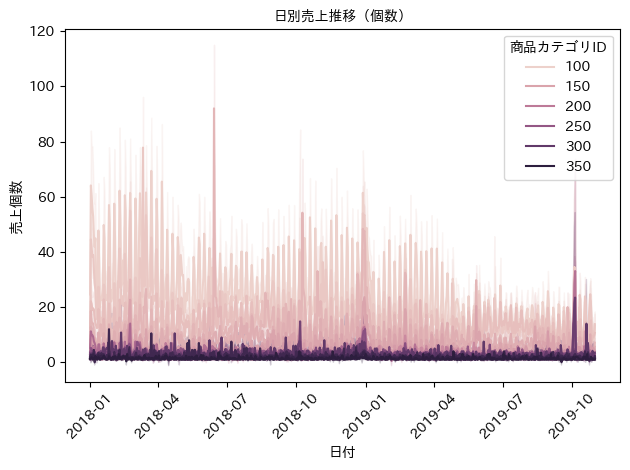

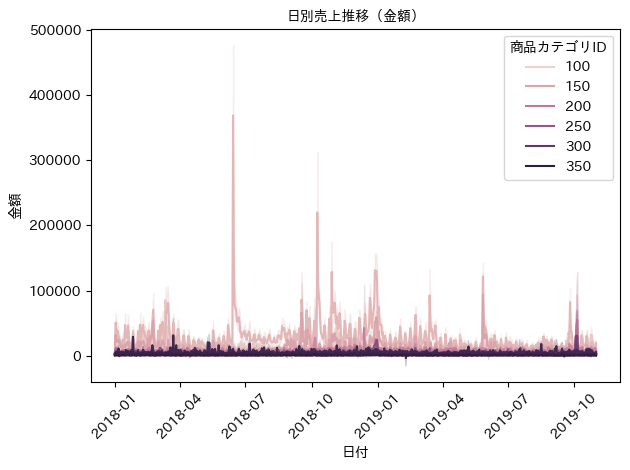

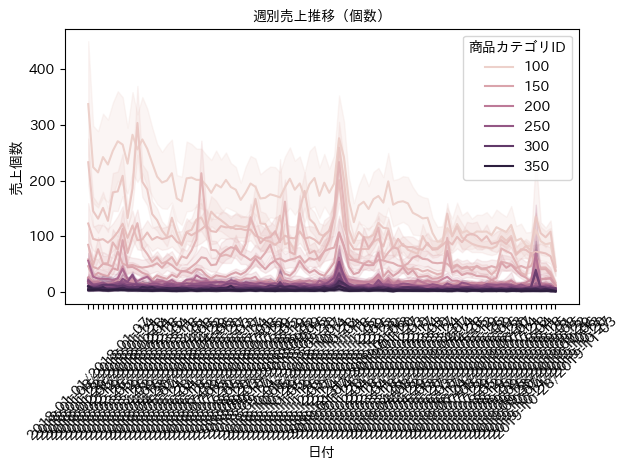

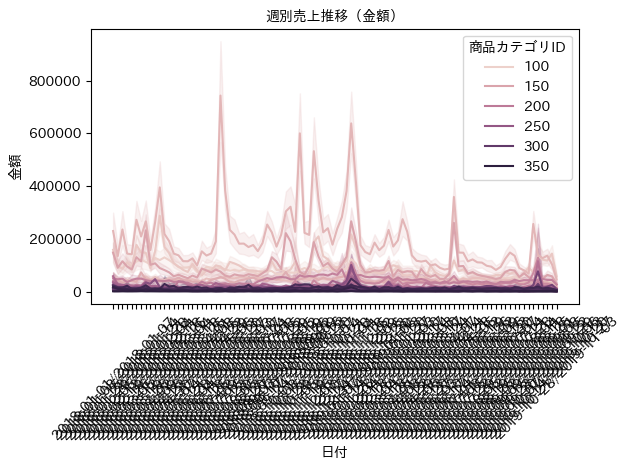

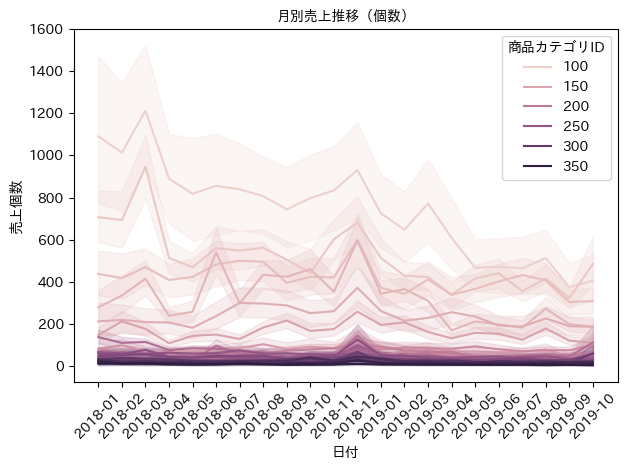

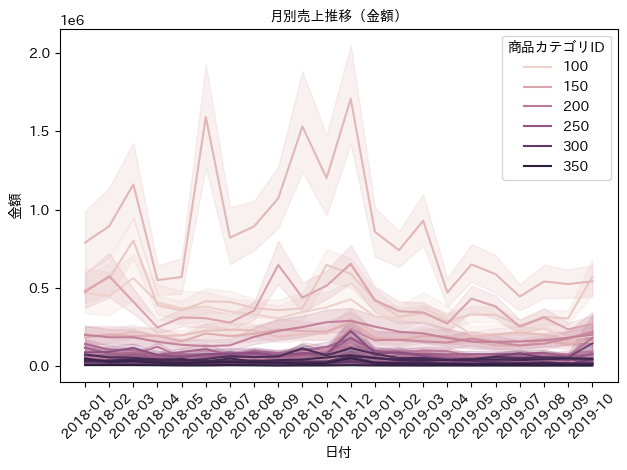

In [28]:


# ------------------- データの可視化 ------------------------------------

# 「金額」を計算する（商品価格 × 売上個数）
merged_data['金額'] = merged_data['商品価格'] * merged_data['売上個数']

# 日別の売上推移（個数と金額）を計算
daily_sales = merged_data.groupby(['店舗ID', '商品カテゴリID', '日付']).agg({'売上個数': 'sum', '金額': 'sum'}).reset_index()

# 週別の売上推移（個数と金額）を計算
merged_data['週'] = pd.to_datetime(merged_data['日付']).dt.to_period('W').astype(str)
weekly_sales = merged_data.groupby(['店舗ID', '商品カテゴリID', '週']).agg({'売上個数': 'sum', '金額': 'sum'}).reset_index()

# 月別の売上推移（個数と金額）を計算
merged_data['月'] = pd.to_datetime(merged_data['日付']).dt.to_period('M').astype(str)
monthly_sales = merged_data.groupby(['店舗ID', '商品カテゴリID', '月']).agg({'売上個数': 'sum', '金額': 'sum'}).reset_index()

# 各カテゴリの売上推移を可視化
def plot_sales_trend(data, time_column, value_column, title):
    sns.lineplot(x=time_column, y=value_column, hue='商品カテゴリID', data=data)
    plt.title(title, fontproperties=font_prop)
    plt.xlabel('日付', fontproperties=font_prop)  # 日本語対応のための設定
    plt.ylabel(value_column, fontproperties=font_prop)  # 日本語対応のための設定
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 日別売上推移を可視化
plot_sales_trend(daily_sales, '日付', '売上個数', '日別売上推移（個数）')
plot_sales_trend(daily_sales, '日付', '金額', '日別売上推移（金額）')

# 週別売上推移を可視化
plot_sales_trend(weekly_sales, '週', '売上個数', '週別売上推移（個数）')
plot_sales_trend(weekly_sales, '週', '金額', '週別売上推移（金額）')

# 月別売上推移を可視化
plot_sales_trend(monthly_sales, '月', '売上個数', '月別売上推移（個数）')
plot_sales_trend(monthly_sales, '月', '金額', '月別売上推移（金額）')


このコードでは、「**売上個数」と「金額」を集計対象として指定し、それらを基に日別、週別、月別の売上推移を可視化します**。<br>**これで、売上のトレンドを正確に分析できるはずです。**

**2. 似ている店舗はどれとどれか？<br>似ている商品カテゴリはどれとどれか？<br>等、1で可視化したグラフを読 み取って似たもの同士をグルーピングしてみてください。<br> 目で見てなんとなくまとめるでも構いませんし、扱える方はクラスタリング手法を使ってもOKです**

**クラスタリング手法の適用**<br>
ここでは、K-meansクラスタリングを使用して、似た店舗や商品カテゴリをグループ化します。クラスタリングに使う特徴量としては、例えば、各店舗やカテゴリの売上個数や売上金額の合計値を使うことが考えられます。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


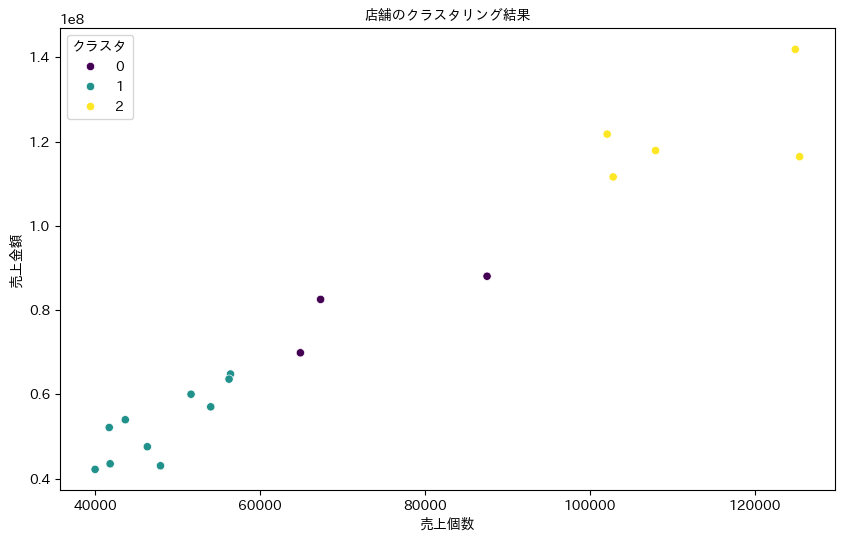

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


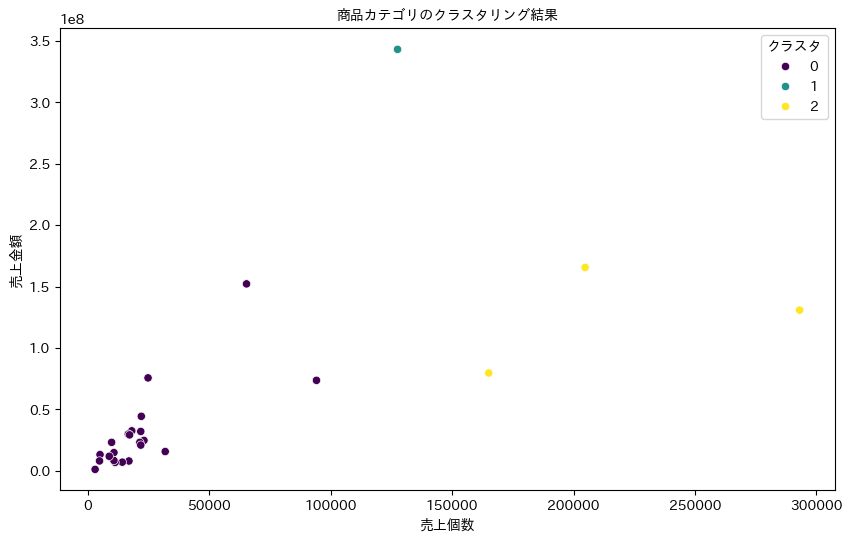

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rcParams
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np


# ------------------- データの統合 ------------------------------------

# sales_data と item_category_data を商品IDで結合
# merged_data = pd.merge(sales_data, item_category_data, on='商品ID', how='left')

# 「金額」を計算する（商品価格 × 売上個数）
merged_data['金額'] = merged_data['商品価格'] * merged_data['売上個数']

# ------------------- クラスタリングの実施 ------------------------------------

# 各店舗ごとの売上個数と金額の合計を計算
store_sales = merged_data.groupby('店舗ID').agg({'売上個数': 'sum', '金額': 'sum'}).reset_index()

# 標準化
scaler = StandardScaler()
store_sales_scaled = scaler.fit_transform(store_sales[['売上個数', '金額']])

# K-meansクラスタリングの実施
kmeans = KMeans(n_clusters=3, random_state=42)
store_sales['クラスタ'] = kmeans.fit_predict(store_sales_scaled)

# クラスタリング結果の可視化
plt.figure(figsize=(10, 6))
sns.scatterplot(x='売上個数', y='金額', hue='クラスタ', data=store_sales, palette='viridis')
plt.title('店舗のクラスタリング結果', fontproperties=font_prop)
plt.xlabel('売上個数', fontproperties=font_prop)
plt.ylabel('売上金額', fontproperties=font_prop)
plt.show()

# 各商品カテゴリごとの売上個数と金額の合計を計算
category_sales = merged_data.groupby('商品カテゴリID').agg({'売上個数': 'sum', '金額': 'sum'}).reset_index()

# 標準化
category_sales_scaled = scaler.fit_transform(category_sales[['売上個数', '金額']])

# K-meansクラスタリングの実施
kmeans = KMeans(n_clusters=3, random_state=42)
category_sales['クラスタ'] = kmeans.fit_predict(category_sales_scaled)

# クラスタリング結果の可視化
plt.figure(figsize=(10, 6))
sns.scatterplot(x='売上個数', y='金額', hue='クラスタ', data=category_sales, palette='viridis')
plt.title('商品カテゴリのクラスタリング結果', fontproperties=font_prop)
plt.xlabel('売上個数', fontproperties=font_prop)
plt.ylabel('売上金額', fontproperties=font_prop)
plt.show()


**説明**<br>
データの集計:

各店舗ごと、各商品カテゴリごとに売上個数と売上金額の合計を計算します。
データの標準化:

K-meansクラスタリングを行う前に、データを標準化（スケーリング）します。これにより、異なるスケールのデータを適切に扱うことができます。
K-meansクラスタリング:

K-meansクラスタリングを使って、似たパターンを持つ店舗や商品カテゴリを3つのグループに分けます（n_clusters=3 は、クラスタの数を表します）。
クラスタリング結果の可視化:

クラスタリングされた店舗や商品カテゴリを散布図としてプロットし、各クラスタごとに色分けします。

このクラスタリング結果を使用して、似た店舗や商品カテゴリを特定し、それに基づいてグルーピングすることができます。グラフを確認し、どの店舗や商品カテゴリが似ているかを視覚的に分析することもできます。

クラスタリングの結果を基に、各クラスタに属する店舗や商品カテゴリの特徴を分析します。

店舗のクラスタリングの結果
クラスタ0 (紫色):

売上個数と売上金額の範囲は中間層に位置しています。
このクラスタに属する店舗は、売上個数も金額も安定して中程度であり、バランスの取れた店舗が多いと考えられます。
クラスタ1 (緑色):

売上個数も売上金額も低い店舗が多く、売上が最も少ないグループです。
このクラスタの店舗は小規模で、売上が低い傾向にあります。
クラスタ2 (黄色):

売上個数と売上金額がともに高い店舗が属しています。
このクラスタの店舗は大規模で、売上が非常に高い傾向があります。売上の多い主力店舗がここに分類されます。

商品カテゴリのクラスタリングの結果
クラスタ0 (紫色):

売上個数および売上金額が最も低いカテゴリが含まれています。
このクラスタに属する商品カテゴリは、ニッチな市場をターゲットにしており、販売数が少ないと考えられます。
クラスタ1 (緑色):

1つの例外を除き、売上金額は比較的高いものの、売上個数は中程度または低い商品カテゴリが含まれています。
例外的に非常に高い売上金額を持つカテゴリが1つあり、それは市場のリーダー商品である可能性があります。
クラスタ2 (黄色):

売上個数と売上金額が中程度のカテゴリが含まれています。
このクラスタのカテゴリは、広範な顧客層に対して比較的安定した売上を持つ商品カテゴリが分類されています。


**分析まとめ**<br>
**店舗については**、売上の規模に応じて3つのクラスタに分けられました。<br>クラスタ2は主力店舗、クラスタ0は中規模、クラスタ1は売上が少ない店舗という特徴があります。<br>
**商品カテゴリについては**、売上の規模や個数に応じて分類されており、特にクラスタ1の一部商品カテゴリが市場リーダーである可能性があります。<br>
この分析結果を基に、売上戦略を立てたり、特定のクラスタに属する店舗や商品に焦点を当てた施策を検討することができます。

**3. 2でまとめたグループの単位で再度売り上げ推移を可視化し、「そのグループの傾向・特徴・パター ン」を読み解いてください。**<br>なぜそのグループにまとまっているか？が説明できるよう、分けた各グ ループを文章やキーワードで表現してみてください。<br> →このグループは「売り上げ急成長パターン」、そのグループは「売り上げ鈍化パターン」等

**コード：クラスタごとの売上推移の可視化**

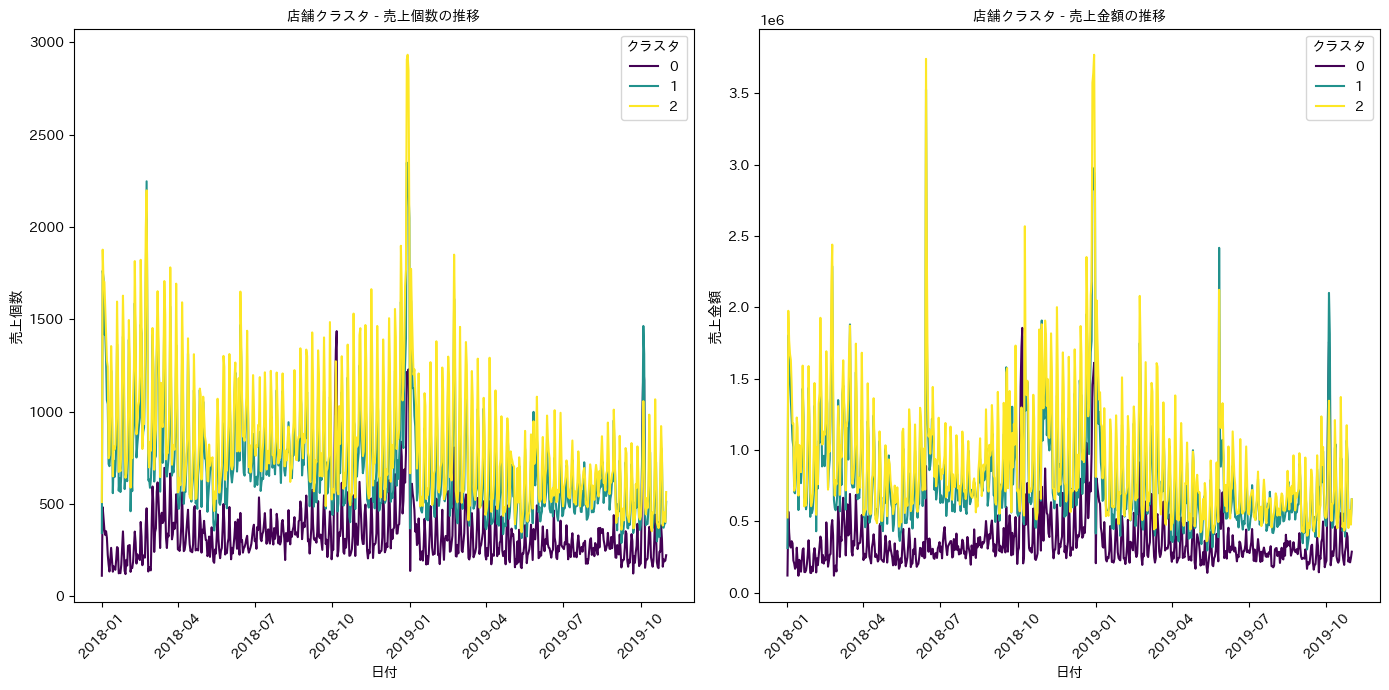

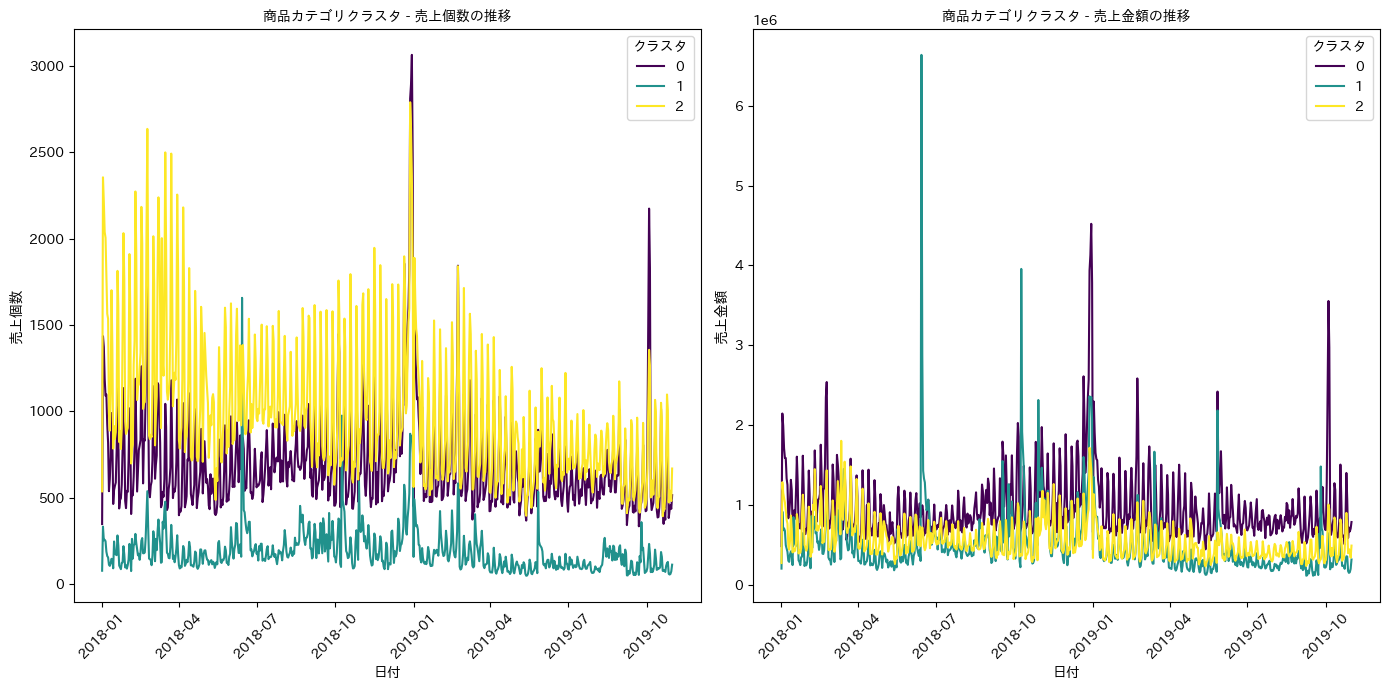

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# クラスタごとの売上推移を計算・可視化
def plot_cluster_trends(cluster_data, group_by_col, title):
    # 日別の売上推移を計算
    daily_sales = cluster_data.groupby([group_by_col, '日付']).agg({'売上個数': 'sum', '金額': 'sum'}).reset_index()

    # クラスタごとにプロット
    plt.figure(figsize=(14, 7))

    # 売上個数の推移
    plt.subplot(1, 2, 1)
    sns.lineplot(x='日付', y='売上個数', hue=group_by_col, data=daily_sales, palette='viridis')
    plt.title(f'{title} - 売上個数の推移', fontproperties=font_prop)
    plt.xticks(rotation=45)
    plt.xlabel('日付', fontproperties=font_prop)
    plt.ylabel('売上個数', fontproperties=font_prop)

    # 売上金額の推移
    plt.subplot(1, 2, 2)
    sns.lineplot(x='日付', y='金額', hue=group_by_col, data=daily_sales, palette='viridis')
    plt.title(f'{title} - 売上金額の推移', fontproperties=font_prop)
    plt.xticks(rotation=45)
    plt.xlabel('日付', fontproperties=font_prop)
    plt.ylabel('売上金額', fontproperties=font_prop)

    plt.tight_layout()
    plt.show()

# 店舗のクラスタごとの売上推移を可視化
plot_cluster_trends(merged_data.merge(store_sales[['店舗ID', 'クラスタ']], on='店舗ID'), 'クラスタ', '店舗クラスタ')

# 商品カテゴリのクラスタごとの売上推移を可視化
plot_cluster_trends(merged_data.merge(category_sales[['商品カテゴリID', 'クラスタ']], on='商品カテゴリID'), 'クラスタ', '商品カテゴリクラスタ')


**分析と特徴の読み取り**

**店舗クラスタ**<br>
クラスタ0 (中規模店舗): **太字**

傾向・パターン: 売上個数・売上金額ともに中間的で、一定の売上を維持しています。<br>
**表現: 「安定した売上パターン」**
このクラスタの店舗は、安定した顧客基盤を持ち、大きな変動なく売上を維持しているのが特徴です。売上が急激に伸びたり減少したりすることは少なく、継続的に一定の売上を確保しています。<br>
**クラスタ1 (小規模店舗):**

傾向・パターン: 売上個数・売上金額ともに低く、特に売上の成長が見られません。<br>
**表現: 「低成長・低売上パターン」**
このクラスタに属する店舗は、売上が低く、成長の余地が少ないか、何らかの制約によって成長が阻害されています。店舗の規模が小さく、客数が少ないことが売上低迷の原因と考えられます。<br>
**クラスタ2 (大規模店舗):**

傾向・パターン: 売上個数・売上金額ともに高く、トップクラスの売上を誇ります。<br>
**表現: 「高成長・高売上パターン」**<br>
このクラスタの店舗は、顧客に人気があり、大規模な売上を達成しています。新商品の導入や積極的なマーケティング施策が成功し、他の店舗に比べて急成長している可能性があります。


**商品カテゴリクラスタ**<br>
**クラスタ0 (ニッチカテゴリ):**

傾向・パターン: 売上個数・売上金額ともに低く、市場規模が小さい。<br>
**表現: 「限定的な市場パターン」**
このクラスタに属する商品カテゴリは、特定の顧客層にのみ人気があるニッチ商品で、全体的な売上規模は小さいです。<br>
**クラスタ1 (市場リーダーを含むカテゴリ):**<br>

傾向・パターン: 例外的に売上金額が高い商品が含まれていますが、全体的には売上個数が中程度か低い。<br>
**表現: 「混合パターン」**
このクラスタには、市場リーダー的な商品カテゴリが含まれており、それが全体の売上金額を押し上げていますが、その他のカテゴリはあまり売上を伸ばしていません。<br>
**クラスタ2 (中程度の売上カテゴリ):**<br>

傾向・パターン: 売上個数・売上金額ともに中間層に位置する。<br>
**表現: 「安定成長パターン」**
このクラスタに属する商品カテゴリは、広範な顧客層に訴求し、安定した売上を確保しています。新しいトレンドに乗っている可能性がありますが、大規模な売上に達しているわけではありません。

**まとめ**<br>
この分析から、各クラスタの傾向やパターンが理解できました。それぞれのクラスタに属する店舗や商品カテゴリがなぜそのグループに属しているのかを説明する際に、売上の安定性、成長率、売上規模などの観点から考えるとわかりやすいです。この情報は、今後の戦略立案やマーケティング施策の立案に役立てることができます。